## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.

It has been estimated by Nilson Report that by 2020, banking frauds would account for $30 billion worldwide. With the rise in digital payment channels, the number of fraudulent transactions is also increasing in new and different ways. 

In the banking industry, credit card fraud detection using machine learning is not only a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees as well as denials of legitimate transactions.

#### The problem statement chosen for this project is to predict fraudulent credit card transactions with the help of machine learning models.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

In [2]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# increasing the maximum number of rows and columns displayable to 150
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)

In [2]:
# import machine learning and stats libraries:
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
# Import:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

#install scikit-optimize
!pip install scikit-optimize
from skopt import BayesSearchCV

## Exploratory data analysis

In [3]:
# To be used in normal machine
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Examining the dataset imported:
df.shape

(284807, 31)

- The dataset contains 284807 rows and 31 columns

In [ ]:
# Lets check the numeric distribution of the data:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
#Examining the data frame for the shape, datatypes, NUlls etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [ ]:
#check if any null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

- All the columns in the dataset are numeric.
- The dataset does not contain any NULL values. So, no need to handle NULL values for this dataset. 

In [ ]:
#Checking the fraud/Non_Fraud related percentages 
(df.groupby('Class')['Class'].count()/df['Class'].count()) *100

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64

In [ ]:
#Checking the fraud/Non_Fraud related records
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

- The dataset if hugely skewed. Out of 284807 records only 492 (0.17% approx) are fradulent transaction record. 

In [ ]:
#observe the different feature type present in the data

df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

- Every column is of Float type except Class, which is Integer because it represents 0 or 1 (Non-Fraud or Fraud)

In [8]:
# Lets try to look into the Correlationmatrix 
cor = df.corr()
cor

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,3.061663e-02,-2.476894e-01,1.243481e-01,-6.590202e-02,-9.875682e-02,-1.834533e-01,1.190287e-02,-7.329721e-02,9.043813e-02,2.897530e-02,-5.086602e-02,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,7.433820e-17,2.438580e-16,2.422086e-16,-2.115458e-16,9.352582e-16,-3.252451e-16,6.308789e-16,-5.011524e-16,2.870125e-16,1.818128e-16,1.036959e-16,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,-4.782388e-16,9.468995e-16,-6.588252e-16,3.854521e-16,-2.541036e-16,2.831060e-16,4.934097e-17,-9.883008e-16,2.636654e-16,9.528280e-17,-9.309954e-16,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,6.289267e-16,-5.501758e-17,2.206522e-16,-6.883375e-16,4.271336e-16,1.122756e-16,1.183364e-15,4.576619e-17,5.427965e-16,2.576773e-16,-9.429297e-16,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,6.055490e-16,-2.083600e-16,-5.657963e-16,-1.506129e-16,-8.522435e-17,-1.507718e-16,-6.939204e-16,-4.397925e-16,1.493667e-16,-2.656938e-16,-3.223123e-16,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,-6.601716e-16,7.342759e-16,3.761033e-16,-9.578659e-16,-3.634803e-16,-5.132620e-16,-3.517076e-16,1.425729e-16,1.109525e-15,-3.138234e-16,2.076048e-16,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,2.850776e-16,4.865799e-16,2.140589e-16,-2.268061e-16,3.452801e-16,-6.368111e-18,-2.477917e-16,3.567582e-16,2.811474e-16,2.717167e-16,1.898638e-16,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,3.043333e-17,-1.084105e-15,1.510045e-15,-9.892325e-17,-1.729462e-16,1.936832e-17,2.893672e-16,1.149692e-15,-1.116789e-16,-2.874017e-16,1.744242e-16,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,9.051847e-17,1.954747e-16,-6.266057e-17,-2.382948e-16,-1.131098e-16,2.021491e-16,5.027192e-16,-3.508777e-16,-4.093852e-16,-5.339821e-16,-1.095534e-16,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,-2.771761e-16,4.682341e-16,-2.445230e-15,-2.650351e-16,2.343317e-

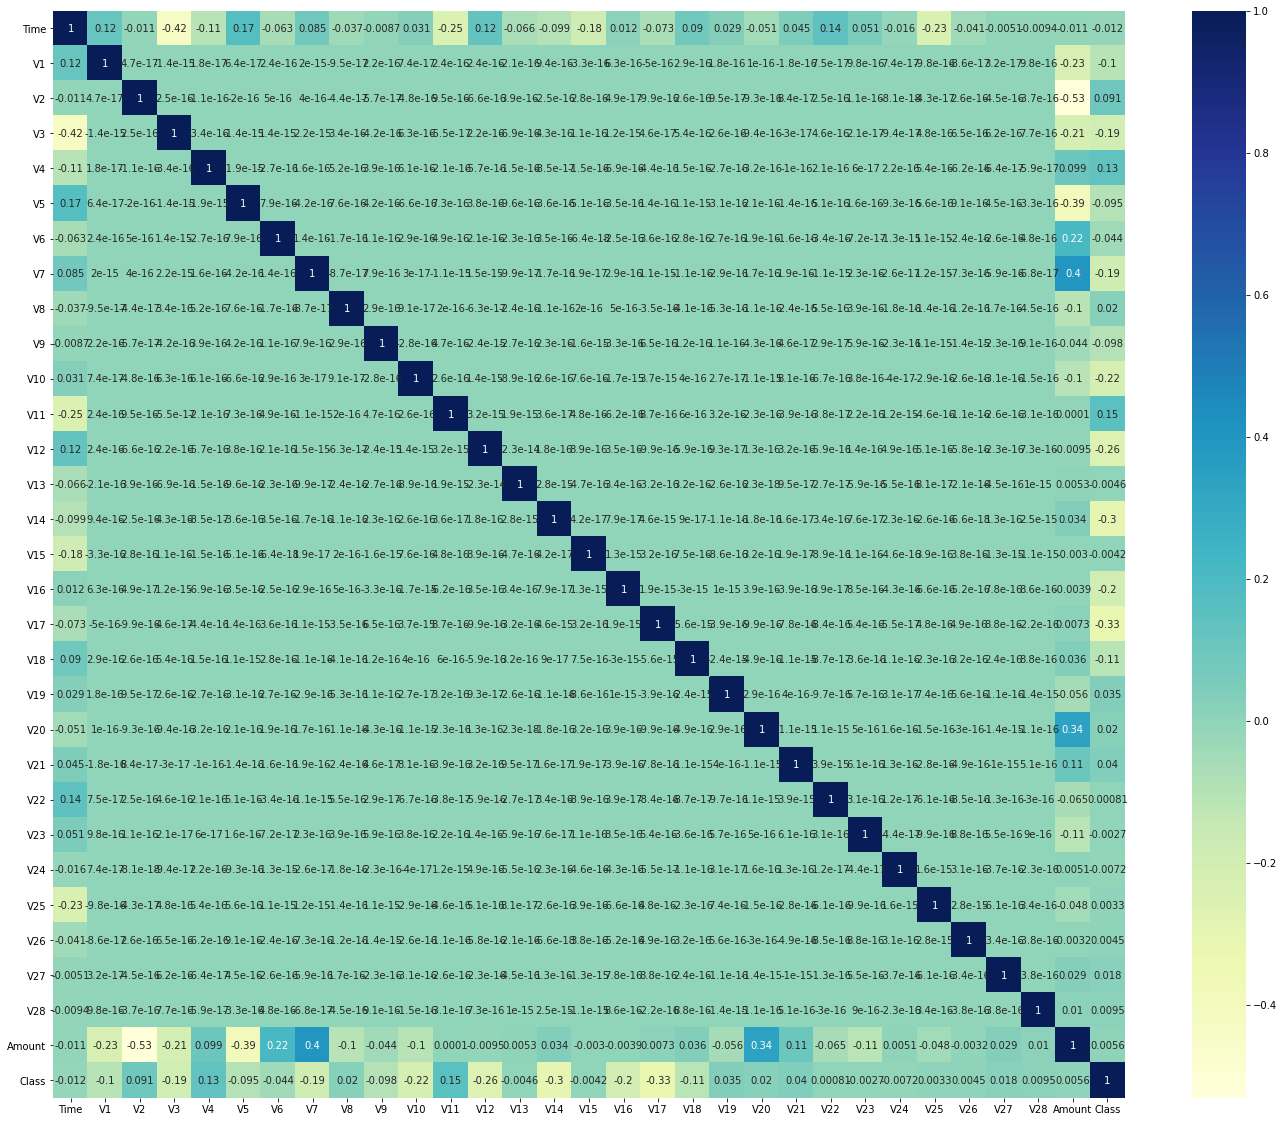

In [9]:
# The matrix is huge and very hard to understand. Let us plot the Heat Map to get a better idea

plt.figure(figsize=(24,20))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

- The plot is also huge but we can see the correlation between different columns

1. Negative Correlations: V17,V16, V14, V12 and V10 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.
2. Positive Correlations: V2, V4, V11, and V19 are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction.
3. BoxPlots: We will use boxplots to have a better understanding of the distribution of these features in fradulent and non fradulent transactions.

##### Negetive Correlations

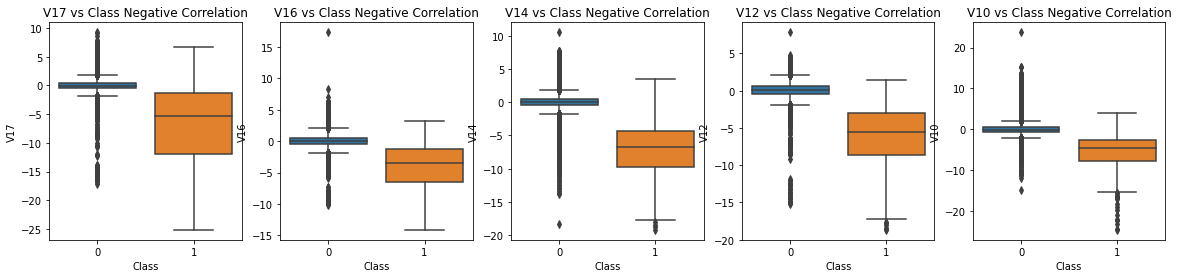

In [16]:
f, axes = plt.subplots(ncols=5, figsize=(20,4))

# Negative Correlations with our Class 
sns.boxplot(x="Class", y="V17", data=df, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V16", data=df, ax=axes[1])
axes[1].set_title('V16 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=df, ax=axes[2])
axes[2].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=df, ax=axes[3])
axes[3].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=df, ax=axes[4])
axes[4].set_title('V10 vs Class Negative Correlation')

plt.show()

##### Conclusions: For the negatively correlated features, the lower the value of the feature, more likely it will be a fraud transaction. 

##### Positive Correlations

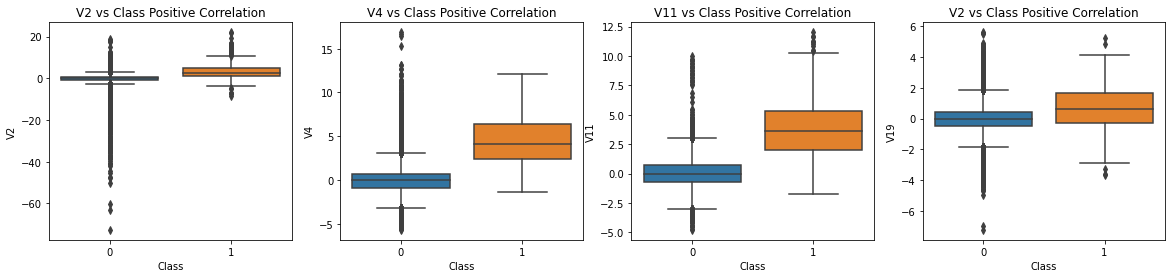

In [17]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Postive Correlations with our Class 
sns.boxplot(x="Class", y="V2", data=df, ax=axes[0])
axes[0].set_title('V2 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=df, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V11", data=df, ax=axes[2])
axes[2].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V19", data=df, ax=axes[3])
axes[3].set_title('V2 vs Class Positive Correlation')

plt.show()

##### Conclusions: For the positively correlated features, the more the value of the feature, more likely it will be a fraud transaction.  

Here we will observe the distribution of our classes

In [ ]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

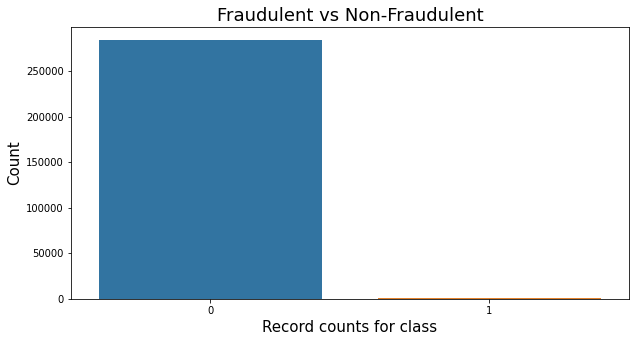

In [ ]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

# Plotting the number of fraudulent vs non-fraudulent transcations

plt.figure(figsize=(10,5))
sns.countplot(df['Class'])
plt.title("Fraudulent vs Non-Fraudulent", fontsize=18)
plt.xlabel("Record counts for class", fontsize=15)
plt.ylabel("Count", fontsize=15)

plt.show()

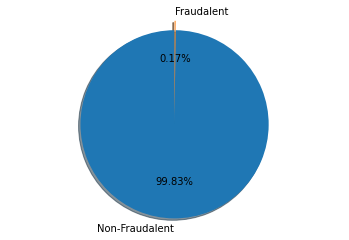

In [ ]:
# Plotting the percentages of fraudulent vs non-fraudulent transcations
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100


labels = 'Non-Fraudalent', 'Fraudalent'
sizes = [normal_share, fraud_share]
explode = (0, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

- We can see both the number of fraud transactions and the percentages of fraud transactions are very small compared to the number or percentage of non-fraud transactions.

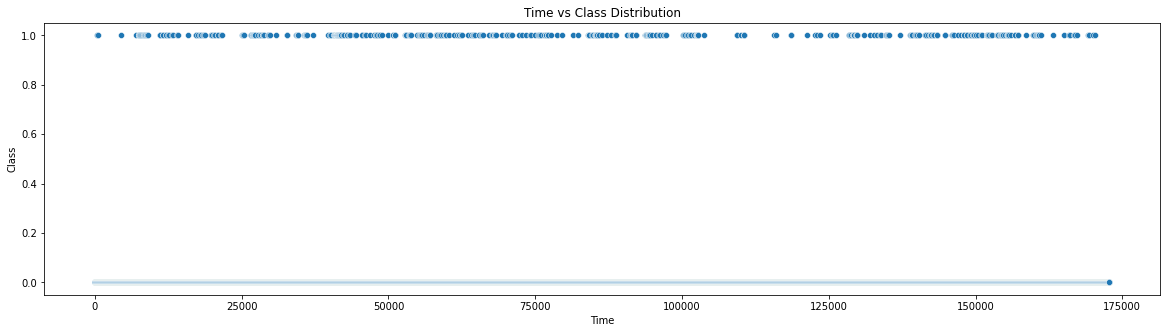

In [ ]:
# Create a scatter plot to observe the distribution of classes with time

# Timedelta represents a duration, the difference between two dates or times
Delta_Time = pd.to_timedelta(df['Time'], unit='s')

#Create derived columns Mins and hours
df['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)

# PLot the relation between Time and Class:
fig = plt.figure(figsize=(20, 5))
sns.scatterplot(x=df['Time'], y='Class', data=df)
plt.xlabel('Time')
plt.ylabel('Class')
plt.tick_params(axis='x')
plt.tick_params(axis='y') 
plt.title('Time vs Class Distribution')
plt.show()

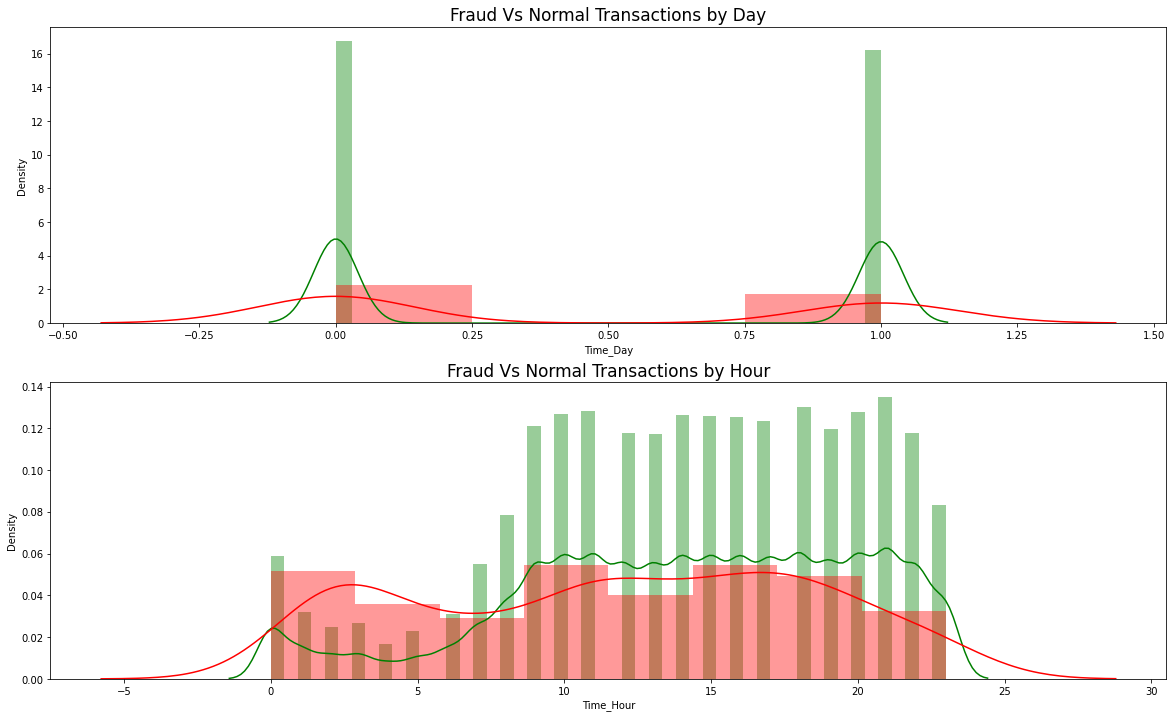

In [ ]:
#The fraus Vs normal trasaction by day
plt.figure(figsize=(20,12))
plt.subplot(2,1,1)
sns.distplot(df[df['Class'] == 0]["Time_Day"], color='green')
sns.distplot(df[df['Class'] == 1]["Time_Day"], color='red')
plt.title('Fraud Vs Normal Transactions by Day', fontsize=17)

#The fraus Vs normal trasaction by hour
plt.subplot(2,1,2)
sns.distplot(df[df['Class'] == 0]["Time_Hour"], color='green')
sns.distplot(df[df['Class'] == 1]["Time_Hour"], color='red')
plt.title('Fraud Vs Normal Transactions by Hour', fontsize=17)
plt.show()

- The distribution of time versus the class. The fraud transactions are very less compared to non fraud in distribution across time. 

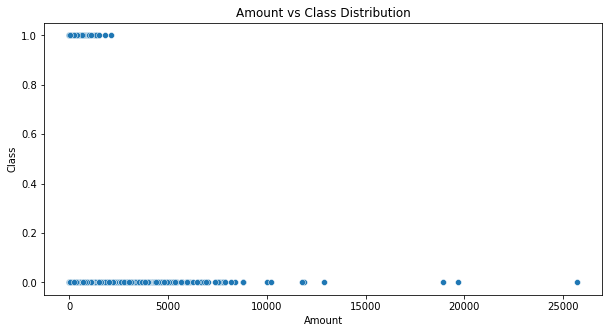

In [ ]:
# Create a scatter plot to observe the distribution of classes with Amount
fig = plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Amount'], y='Class', data=df)
plt.xlabel('Amount')
plt.ylabel('Class')
plt.title('Amount vs Class Distribution')
plt.show()

- As expected the amount for fraud transactions is very less. 

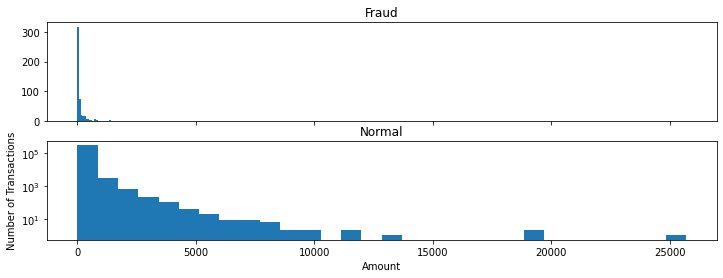

In [ ]:
# Plotting a Histogram for the same 
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

- As we have derived different time components from time, we will use only the derived column hour and remove the rest. 
- Also as the comlmns are derived from PCA, so I am not deleting any column as it may remove some useful information. 

In [ ]:
# Drop unnecessary columns
# As we have derived the Day/Hour/Minutes from the time column we will drop Time
df.drop('Time', axis = 1, inplace= True)
#also day/minutes might not be very useful as this is not time series data, we will keep only derived column hour
df.drop(['Time_Day', 'Time_Min'], axis = 1, inplace= True)

In [ ]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0


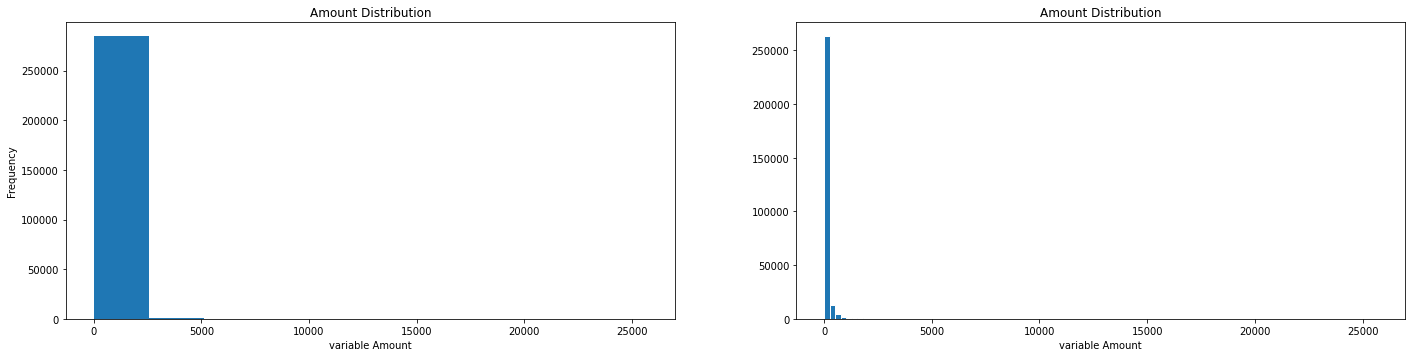

In [ ]:
# Let's try to understand the Amount variable as it is not PCA transformed variable :

plt.figure(figsize=(24, 12))

plt.subplot(2,2,1)
plt.title('Amount Distribution')
df['Amount'].astype(int).plot.hist();
plt.xlabel("variable Amount")

plt.subplot(2,2,2)
plt.title('Amount Distribution')
sns.set()
plt.xlabel("variable Amount")
plt.hist(df['Amount'],bins=100)
plt.show()

### Splitting the data into train & test data

In [10]:
#Create X and y 

y= df['Class']
X = df.drop(['Class'], axis=1)

In [19]:
# Checking X
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [11]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [ ]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


### Plotting the distribution of a variable

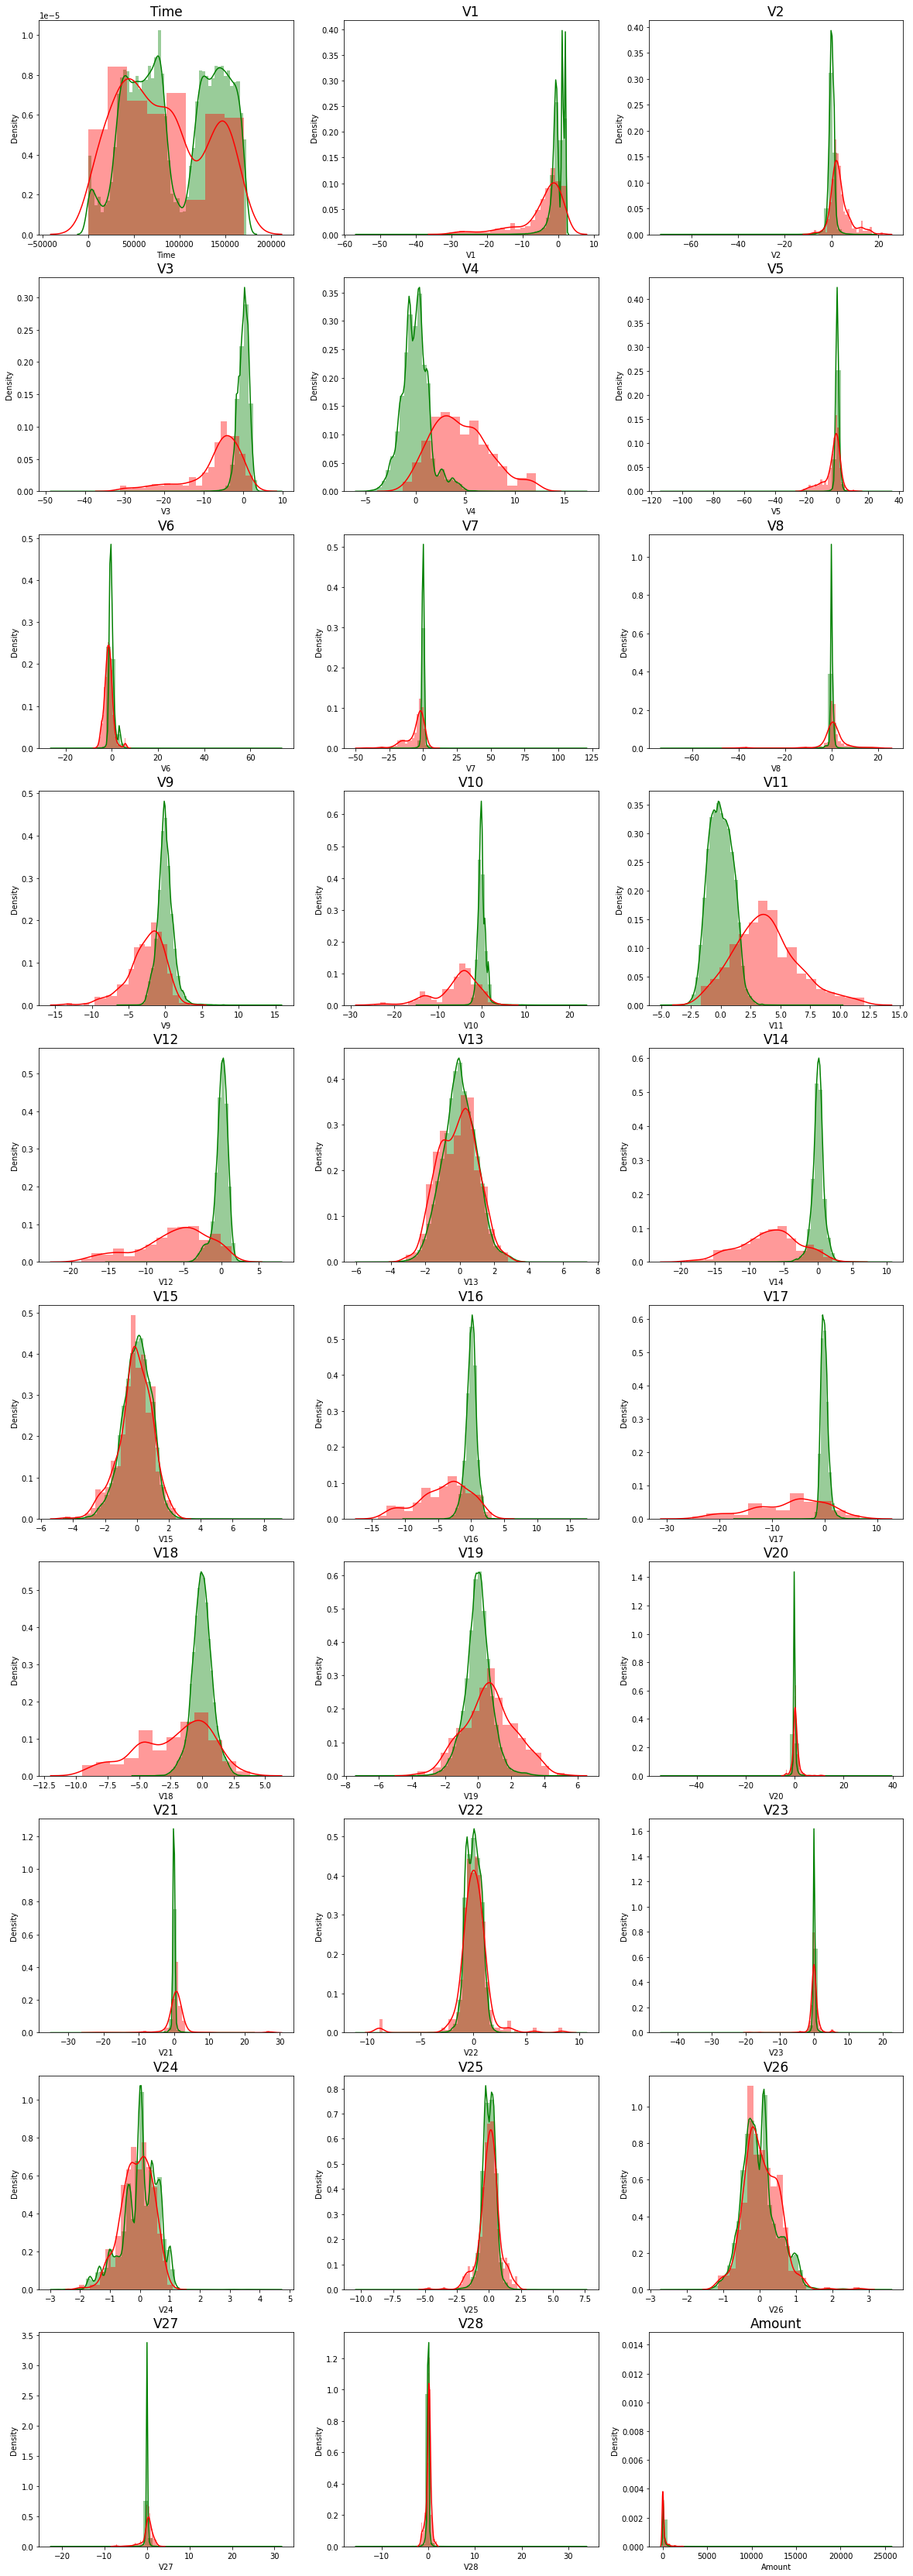

In [12]:
# plot the histogram of a variable from the dataset to see the skewness
cols = list(X.columns.values)

normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][normal_records], color='green')
  sns.distplot(X[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

- We can see that the data is highly skewed 

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [13]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
pt = PowerTransformer()
pt.fit(X_train)                       ## Fit the PT on training data
X_train_pt = pt.transform(X_train)    ## Then apply on all data
X_test_pt = pt.transform(X_test)

In [14]:
#Create Dataframe
X_train_pt_df = pd.DataFrame(data=X_train_pt,   columns=cols)
X_test_pt_df = pd.DataFrame(data=X_test_pt,   columns=cols)

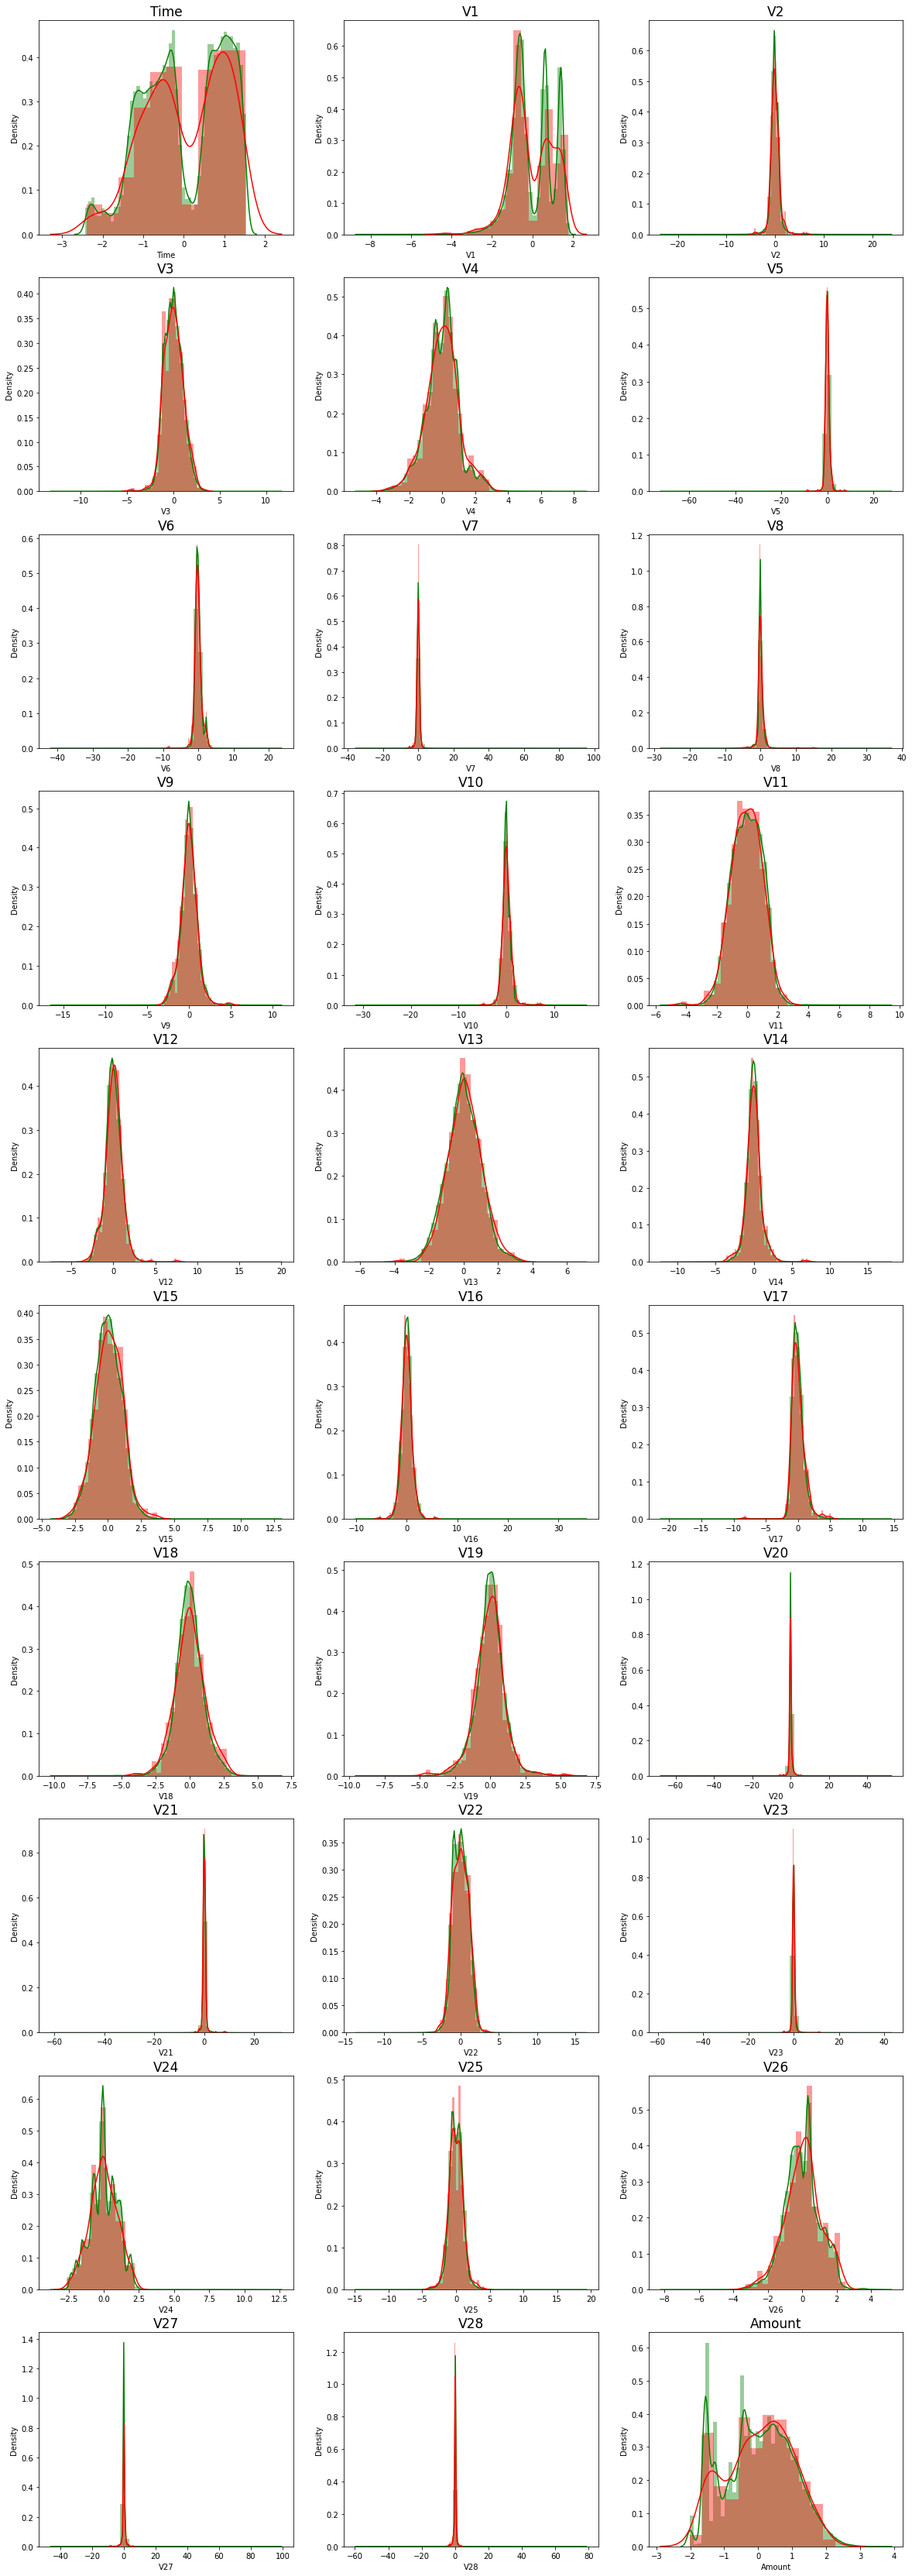

In [24]:
# plot the histogram of a variable from the dataset again to see the result 

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X_train_pt_df[col][normal_records], color='green')
  sns.distplot(X_train_pt_df[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

## Model Building
- Build different models on the imbalanced dataset and see the result

In [15]:
model = list()
resample = list()
precision = list()
recall = list()
F1score = list()
AUCROC = list()

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

from collections import Counter

In [17]:
def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))
          
    model.append(algo)
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    F1score.append(f1_score(y_test,y_pred))
    AUCROC.append(roc_auc_score(y_test, y_prob[:,1]))
    resample.append(sampling)


### Imbalanced Data Models

In [ ]:
# Logistic Regression
from sklearn import linear_model #import the package

# Basic Logistic Regression Model
model_l1 = LogisticRegression()
model_l1.fit(X_train_pt_df, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Result of the Basic Logistic Regression 

test_eval(model_l1, X_test_pt_df, y_test, 'Logistic Regression', 'Basic Logistic')

Confusion Matrix
[[56850    16]
 [   39    57]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.78      0.59      0.67        96

    accuracy                           1.00     56962
   macro avg       0.89      0.80      0.84     56962
weighted avg       1.00      1.00      1.00     56962
 

AUC-ROC
0.9680665585176847


In [ ]:
# Cross validation using K-Fold for Logistic Regression

kfold = model_selection.KFold(n_splits=5, random_state=100)
model_kfold = LogisticRegression()
results_kfold = model_selection.cross_val_score(model_kfold, X_train_pt_df, y_train, cv=kfold, scoring = 'roc_auc')
print("ROC_AUC: %.3f%% (%.3f%%)" % (results_kfold.mean()*100.0, results_kfold.std()*100.0))


ROC_AUC: 98.156% (0.970%)


In [ ]:
# The resullts of the Cross Validation
results_kfold

array([0.97972175, 0.99128452, 0.96517556, 0.99164358, 0.97998349])

The model seems to do well in the cross validations. Let us try to tune the hyperparameters to get the best Logistic Model

In [ ]:
# Hyper Parameter Tuning using GridSearch CV

log_model=LogisticRegression()
num_C={'C':np.logspace(-10, 1, 15),'class_weight':[None,'balanced'],'penalty':['l1','l2']}
cv_num = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)

# Create grid search using 5-fold cross validation
clf_LR = GridSearchCV(log_model, num_C, cv=cv_num, scoring='roc_auc', n_jobs=-1)
clf_LR.fit(X_train_pt_df, y_train)

# The values of the hyperparameters 
clf_LR.best_estimator_


LogisticRegression(C=0.007196856730011514, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
test_eval(clf_LR, X_test_pt_df, y_test, 'Logistic Regression', 'actual')

Confusion Matrix
[[56852    14]
 [   44    52]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.79      0.54      0.64        96

    accuracy                           1.00     56962
   macro avg       0.89      0.77      0.82     56962
weighted avg       1.00      1.00      1.00     56962
 

AUC-ROC
0.9665630238924255


- The recall is very low

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Cross validation using K-Fold for Decision Tree

kfold = model_selection.KFold(n_splits=5, random_state=100)
tree_kfold = DecisionTreeClassifier(random_state= 100)
results_tree_kfold = model_selection.cross_val_score(tree_kfold, X_train_pt_df, y_train, cv=kfold, scoring = 'roc_auc')
print("ROC_AUC: %.3f%% (%.3f%%)" % (results_tree_kfold.mean()*100.0, results_tree_kfold.std()*100.0))

ROC_AUC: 88.443% (1.461%)


In [ ]:
# The resullts of the Cross Validation
results_tree_kfold

array([0.89402552, 0.88975807, 0.87334335, 0.86232413, 0.90272135])

In [ ]:
# Hyper parameter tuning in Decision Tree

from sklearn.model_selection import GridSearchCV

tree_model = DecisionTreeClassifier(random_state=100)

In [ ]:
# Create the parameter grid based on the results of random search 
tree_param_grid = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 7, 10],
    'criterion': ["gini", "entropy"],
    'min_samples_split' : [2, 5, 10, 15, 20, 50, 100]
}

In [ ]:
clf_DT = RandomizedSearchCV(tree_model, tree_param_grid, cv=cv_num, scoring='roc_auc', n_jobs=-1, verbose=2)
clf_DT.fit(X_train_pt_df, y_train)

# values of best hyper parameters
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.0min finished


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [ ]:
test_eval(clf_DT, X_test_pt_df, y_test, 'Decision Tree', 'actual')

Confusion Matrix
[[56844    22]
 [   21    75]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.77      0.78      0.78        96

    accuracy                           1.00     56962
   macro avg       0.89      0.89      0.89     56962
weighted avg       1.00      1.00      1.00     56962
 

AUC-ROC
0.8974446688999871


- This model seems to be better as it has decent recall and precision score and good AUC-ROC

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Cross validation using K-Fold for Random Forest

kfold = model_selection.KFold(n_splits=5, random_state=100)
RF_kfold = RandomForestClassifier(random_state= 100)
results_RF_kfold = model_selection.cross_val_score(RF_kfold, X_train_pt_df, y_train, cv=kfold, scoring = 'roc_auc')


In [ ]:
print("ROC_AUC: %.3f%% (%.3f%%)" % (results_RF_kfold.mean()*100.0, results_RF_kfold.std()*100.0))

ROC_AUC: 94.798% (0.793%)


In [ ]:
# The resullts of the Cross Validation
results_RF_kfold

array([0.94204559, 0.96057736, 0.94102934, 0.94212406, 0.95411929])

In [ ]:
# Hyper parameter tuning in Random Forest

rf_model = RandomForestClassifier()

rf_params={  
    'max_features': [2,3,4,5],
    'n_estimators': [2, 10, 30, 50, 100],
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 7, 10],
    'min_samples_split' : [2, 5, 10, 15, 20, 50, 100]}

clf_RF = RandomizedSearchCV(rf_model, rf_params, cv=cv_num, scoring='roc_auc', n_jobs=-1, n_iter=20, verbose=2)
clf_RF.fit(X_train_pt_df, y_train)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 27.2min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
test_eval(clf_RF, X_test_pt_df, y_test, 'Random Forest', 'actual')

Confusion Matrix
[[56847    19]
 [   29    67]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.78      0.70      0.74        96

    accuracy                           1.00     56962
   macro avg       0.89      0.85      0.87     56962
weighted avg       1.00      1.00      1.00     56962
 

AUC-ROC
0.9687809572796867


- This model is also good but the Decision tree has slightly better recall score. 

XGBoost

In [ ]:
# Cross validation using K-Fold for XGBoost

import xgboost as xgb
from sklearn import metrics

kfold = model_selection.KFold(n_splits=5, random_state=100)
xgclf = xgb.XGBClassifier(random_state=100)
results_XG_kfold = model_selection.cross_val_score(xgclf, X_train_pt_df, y_train, cv=kfold, scoring = 'roc_auc')

In [ ]:
# The resullts of the Cross Validation
results_XG_kfold

array([0.97951125, 0.98590225, 0.96763542, 0.98117484, 0.96978434])

- After cross validation the model seems to be good 
- Now lets do the hyperparameter tuning for the XGBoost

In [ ]:
xgb_model = xgb.XGBClassifier()

# Default-Run of default-hyperparameters
parameters = {'learning_rate': [0.3],
              'max_depth': [6],
              'min_child_weight': [1],
              'n_estimators': [100]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=3,
                                       scoring=scorer,
                                       refit=True)

clf_xgb.fit(X_train_pt_df, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.3], 'max_depth': [6],
                         'min_child_weight': [1], 'n_estimators': [100]},
             pre_dispatch='2*n_jobs', 

In [ ]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100}
0.9762141451403797
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [ ]:
# Hypertuning the parameters
xgb_model = xgb.XGBClassifier()

# Default-Run of default-hyperparameters
parameters = {'learning_rate': [0.1, 0.3, 0.5],
              'max_depth': [2, 6, 8],
              'min_child_weight': [3, 7, 11],
              'n_estimators': [100, 200, 300]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = model_selection.RandomizedSearchCV(xgb_model,
                                             parameters,
                                             n_jobs=-1,
                                             cv=3,
                                             scoring=scorer,
                                             refit=True,
                                             random_state=100,
                                             verbose=2)

clf_xgb.fit(X_train_pt_df, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


In [ ]:
# Tuned Hyperparamets
optimised_XGBoost = clf_xgb.best_estimator_

In [ ]:
# Values with tuned XGBoost model
test_eval(optimised_XGBoost, X_test_pt_df, y_test, 'XGBoost', 'actual')

Confusion Matrix
[[56859     7]
 [   24    72]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.91      0.75      0.82        96

    accuracy                           1.00     56962
   macro avg       0.96      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962
 

AUC-ROC
0.9729984744838744


- This seems to the best till now as it has very good AUC-ROC score and good precision and recall score

SVM

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf_SVM = svm.SVC(kernel='linear',probability=True) # Linear Kernel

#Train the model using the training sets
clf_SVM.fit(X_train_pt_df, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# Values with tuned SVM model
test_eval(clf_SVM, X_test_pt_df, y_test, 'Basic SVM', 'actual')

Confusion Matrix
[[56843    23]
 [   29    67]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.74      0.70      0.72        96

    accuracy                           1.00     56962
   macro avg       0.87      0.85      0.86     56962
weighted avg       1.00      1.00      1.00     56962
 

AUC-ROC
0.9442576627510287


In [ ]:
# Hyper Parameter tuning with SVM to find optimal values using cross validation

cv = StratifiedKFold(n_splits=3, random_state=100, shuffle=True)
SVM_model = svm.SVC(probability=True, random_state=100)
# defining parameter range 
SVM_param_grid = {'C': [0.5, 0.7, 0.9],  
              'gamma': [1, 0.1, 0.01, 0.001], 
              'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}  

clf_SVM_2 = RandomizedSearchCV(SVM_model, SVM_param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=2)
clf_SVM_2.fit(X_train_pt_df, y_train)
clf_SVM_2.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 46.1min finished


SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=100, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# Values with tuned SVM model
SVM_optimal_model = clf_SVM_2.best_estimator_
test_eval(SVM_optimal_model, X_test_pt_df, y_test, 'Tuned SVM', 'actual')

- This model not seems to be good with preciosn 74 and recall 70 for class 1

KNN : It is not being possible to run KNN on this dataset. It is taking huge time. So, not using KNN.

In [ ]:
clf = clf_xgb.best_estimator_  #initialise the model with optimum hyperparameters
final_model=clf.fit(X_train, y_train)
test_eval(final_model, X_test, y_test, 'XGBoost', 'actual')
#print --> #print the evaluation score on the X_test by choosing the best evaluation metric

Confusion Matrix
[[56859     7]
 [   24    72]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.91      0.75      0.82        96

    accuracy                           1.00     56962
   macro avg       0.96      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962
 

AUC-ROC
0.9729984744838744


### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

In [ ]:
### ADASYN ###

from imblearn.over_sampling import ADASYN

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=130)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

counter = Counter(y_train_ada)
print('After',counter)


Before Counter({0: 227449, 1: 396})
After Counter({0: 227449, 1: 227418})


In [ ]:
##### SMOTE #####

from imblearn.over_sampling import SMOTE

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({0: 227449, 1: 396})
After Counter({0: 227449, 1: 227449})


In [ ]:
### Random Oversampling ####

from imblearn.over_sampling import RandomOverSampler

counter = Counter(y_train)
print('Before',counter)
ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_sample(X_train, y_train)

counter = Counter(y_train_ros)
print('After',counter)

Before Counter({0: 227449, 1: 396})
After Counter({0: 227449, 1: 227449})


## Model Building
- Build different models on the balanced dataset and see the result

In [ ]:
# Logistic Regression
from sklearn import linear_model #import the package
import numpy as np

num_C={'C':np.logspace(-10, 1, 15),'class_weight':[None,'balanced'],'penalty':['l1','l2']}
cv_num = StratifiedKFold(n_splits=3, random_state=100, shuffle=True)

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Oversampling

In [ ]:
#from imblearn import over_sampling #- import the packages

### Random Oversampling ####

from imblearn.over_sampling import RandomOverSampler

counter = Counter(y_train)
print('Before',counter)
ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_sample(X_train_pt_df, y_train)

counter = Counter(y_train_ros)
print('After',counter)

#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


Before Counter({0: 227449, 1: 396})
After Counter({0: 227449, 1: 227449})


In [ ]:
### Logistic Regression ###

model_lb1 = LogisticRegression()
model_lb1.fit(X_train_ros, y_train_ros)

# Result of the Balanced Logistic Regression 

test_eval(model_lb1, X_test_pt_df, y_test, 'Logistic Regression', 'Balanced Logistic')

Confusion Matrix
[[55498  1368]
 [   12    84]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.88      0.11        96

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962
 

AUC-ROC
0.9693710689750172


- The model has a good recall score but the Precision is very low, so can not use the model.  

Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Cross validation using K-Fold for Decision Tree

kfold = model_selection.StratifiedKFold(n_splits=3, random_state=100)
tree_kfold_b = DecisionTreeClassifier(random_state= 100)
results_tree_kfold_b = model_selection.cross_val_score(tree_kfold_b, X_train_ros, y_train_ros, cv=kfold, scoring = 'roc_auc')
print("ROC_AUC: %.3f%% (%.3f%%)" % (results_tree_kfold_b.mean()*100.0, results_tree_kfold_b.std()*100.0))

ROC_AUC: 99.975% (0.003%)


In [ ]:
# The resullts of the Cross Validation
results_tree_kfold_b

array([0.99972302, 0.99978237, 0.9997362 ])

In [ ]:
# Hyper parameter tuning in Decision Tree

from sklearn.model_selection import GridSearchCV

tree_model_b = DecisionTreeClassifier(random_state=100)


In [ ]:
# Create the parameter grid based on the results of random search 
tree_param_grid = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 7, 10],
    'criterion': ["gini", "entropy"],
    'min_samples_split' : [2, 5, 10, 15, 20, 50, 100]
}

clf_DT_b = RandomizedSearchCV(tree_model_b, tree_param_grid, cv=cv_num, scoring='roc_auc', n_jobs=-1, verbose=2)
clf_DT_b.fit(X_train_ros, y_train_ros)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.9min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=100, shuffle=True),
                   error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
    

In [ ]:
# values of best hyper parameters
clf_DT_b.best_estimator_


test_eval(clf_DT_b, X_test_pt_df, y_test, 'Decision Tree', 'actual')

Confusion Matrix
[[56817    49]
 [   26    70]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.59      0.73      0.65        96

    accuracy                           1.00     56962
   macro avg       0.79      0.86      0.83     56962
weighted avg       1.00      1.00      1.00     56962
 

AUC-ROC
0.8643615033587732


- The recall is good but the precision is not that good. 

In [ ]:
### Random Forest ###
from sklearn.ensemble import RandomForestClassifier

kfold = model_selection.StratifiedKFold(n_splits=3, random_state=100)
RF_kfold = RandomForestClassifier(random_state= 100)
results_RF_kfold = model_selection.cross_val_score(RF_kfold, X_train_ros, y_train_ros, cv=kfold, scoring = 'roc_auc')

In [ ]:
print("ROC_AUC: %.3f%% (%.3f%%)" % (results_RF_kfold.mean()*100.0, results_RF_kfold.std()*100.0))

# The resullts of the Cross Validation
results_RF_kfold

ROC_AUC: 100.000% (0.000%)


array([1., 1., 1.])

In [ ]:
# Hyper parameter tuning in Random Forest

rf_model_b = RandomForestClassifier()

rf_params={  
    'max_features': [2,3,4,5],
    'n_estimators': [2, 10, 30, 50, 100],
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 7, 10],
    'min_samples_split' : [2, 5, 10, 15, 20, 50, 100]}

clf_RF_b = RandomizedSearchCV(rf_model_b, rf_params, cv=cv_num, scoring='roc_auc', n_jobs=-1, n_iter=20, verbose=2)
clf_RF_b.fit(X_train_ros, y_train_ros)
clf_RF_b.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 18.6min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=2,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
test_eval(clf_RF_b, X_test_pt_df, y_test, 'Random Forest', 'actual')

Confusion Matrix
[[56860     6]
 [   40    56]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.90      0.58      0.71        96

    accuracy                           1.00     56962
   macro avg       0.95      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962
 

AUC-ROC
0.8642874073846116


- In this case the precision is very good, but the recall is very less. For ousr purpose, we need model with good recall score. 

In [ ]:
### XGBOOST ###

import xgboost as xgb
from sklearn import metrics

kfold = model_selection.StratifiedKFold(n_splits=3, random_state=100)
xgclf = xgb.XGBClassifier(random_state=100)
results_XG_kfold = model_selection.cross_val_score(xgclf, X_train_ros, y_train_ros, cv=kfold, scoring = 'roc_auc')


# The resullts of the Cross Validation
results_XG_kfold


array([0.99974388, 0.99977988, 0.99973752])

- The cross validation score seems to be good.

In [ ]:
# Basic model
xgb_model = xgb.XGBClassifier()

# Default-Run of default-hyperparameters
parameters = {'learning_rate': [0.3],
              'max_depth': [6],
              'min_child_weight': [1],
              'n_estimators': [100]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)
clf_xgb_b = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=3,
                                       scoring=scorer,
                                       refit=True)

clf_xgb_b.fit(X_train_ros, y_train_ros)

print(clf_xgb_b.best_params_)
print(clf_xgb_b.best_score_)
var=clf_xgb_b.best_estimator_

{'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100}
0.9999930614578045


In [ ]:
# Hypertuning the parameters
xgb_model = xgb.XGBClassifier()

# Default-Run of default-hyperparameters
parameters = {'learning_rate': [0.1, 0.3],
              'max_depth': [2, 6],
              'min_child_weight': [3, 7, 11],
              'n_estimators': [100, 200, 300]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb_b = model_selection.RandomizedSearchCV(xgb_model,
                                             parameters,
                                             n_jobs=-1,
                                             cv=3,
                                             scoring=scorer,
                                             refit=True,
                                             random_state=100,
                                             verbose=2)

clf_xgb_b.fit(X_train_ros, y_train_ros)

# Tuned Hyperparamets
optimised_XGBoost = clf_xgb_b.best_estimator_




Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 41.3min finished


In [ ]:
# Values with tuned XGBoost model
test_eval(optimised_XGBoost, X_test_pt_df.values, y_test.values, 'XGBoost', 'actual')

Confusion Matrix
[[56857     9]
 [   22    74]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.89      0.77      0.83        96

    accuracy                           1.00     56962
   macro avg       0.95      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962
 

AUC-ROC
0.9652183971969192


- Here the model seems to best of the lot with good recall and precision and also good AUC-ROC

In [ ]:
#### KNN #####
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
#neighbors = 5
# train_accuracy =np.empty(len(neighbors))
# test_accuracy = np.empty(len(neighbors))

# for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
knn_5 = KNeighborsClassifier(n_neighbors=5)
    
    #Fit the model
knn_5.fit(X_train_ros, y_train_ros)
    
    #Compute accuracy on the training set
train_accuracy = knn_5.score(X_train_ros, y_train_ros)
    
    #Compute accuracy on the test set
test_accuracy = knn_5.score(X_test_pt_df, y_test) 

In [ ]:
#### KNN #####
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
#neighbors = 5
# train_accuracy =np.empty(len(neighbors))
# test_accuracy = np.empty(len(neighbors))

# for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
knn_7 = KNeighborsClassifier(n_neighbors=7)
    
    #Fit the model
knn_7.fit(X_train_ros, y_train_ros)
    
    #Compute accuracy on the training set
train_accuracy = knn_7.score(X_train_ros, y_train_ros)
    
    #Compute accuracy on the test set
test_accuracy = knn_7.score(X_test_pt_df, y_test) 

In [ ]:
print(train_accuracy)
print(test_accuracy)

0.9997142216496885
0.9985955549313578


In [ ]:
#### KNN #####
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
#neighbors = 5
# train_accuracy =np.empty(len(neighbors))
# test_accuracy = np.empty(len(neighbors))

# for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
knn_9 = KNeighborsClassifier(n_neighbors=9)
    
    #Fit the model
knn_9.fit(X_train_ros, y_train_ros)
    
    #Compute accuracy on the training set
train_accuracy = knn_9.score(X_train_ros, y_train_ros)
    
    #Compute accuracy on the test set
test_accuracy = knn_9.score(X_test_pt_df, y_test) 

In [ ]:
print(train_accuracy)
print(test_accuracy)

0.9996306864395974
0.9984375548611355


### SMOTE

### Print the class distribution after applying SMOTE 

In [ ]:
from imblearn.over_sampling import SMOTE

from collections import Counter


Before Counter({0: 227449, 1: 396})
After Counter({0: 227449, 1: 227449})


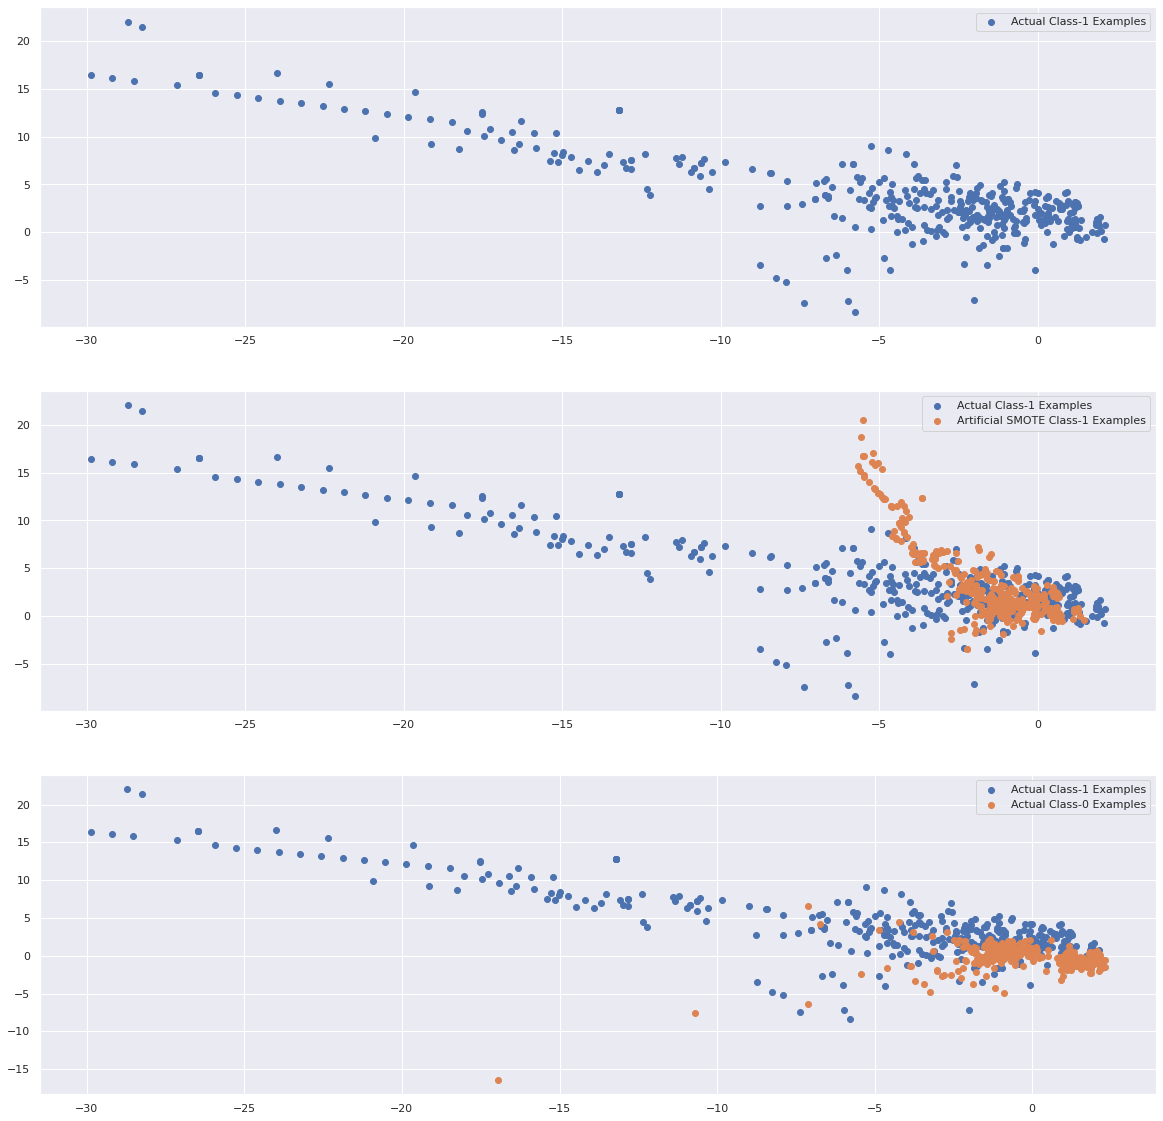

In [ ]:
import warnings
warnings.filterwarnings("ignore")

counter = Counter(y_train)
print('Before',counter)
sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train_pt_df, y_train)

counter = Counter(y_train_smote)
print('After',counter)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
# Logistic Regression
from sklearn import linear_model #import the package

# Basic Logistic Regression Model
model_l1 = LogisticRegression()
model_l1.fit(X_train_smote, y_train_smote)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Result of the Basic Logistic Regression 

test_eval(model_l1, X_test_pt_df, y_test, 'Logistic Regression', 'Basic Logistic')

Confusion Matrix
[[55401  1465]
 [   11    85]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56866
           1       0.05      0.89      0.10        96

    accuracy                           0.97     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.97      0.99     56962
 

AUC-ROC
0.9682821604004737


In [ ]:
# Cross validation using K-Fold for Logistic Regression

kfold = model_selection.StratifiedKFold(n_splits=5, random_state=100)
model_kfold = LogisticRegression()
results_kfold_smote = model_selection.cross_val_score(model_kfold, X_train_smote, y_train_smote, cv=kfold, scoring = 'roc_auc')
print("ROC_AUC: %.3f%% (%.3f%%)" % (results_kfold_smote.mean()*100.0, results_kfold_smote.std()*100.0))

ROC_AUC: 99.014% (0.015%)


In [ ]:
results_kfold_smote

array([0.99020458, 0.99034588, 0.99020118, 0.99006564, 0.98990389])

In [ ]:
# Hyper Parameter Tuning using GridSearch CV

log_model=LogisticRegression()
num_C={'C':np.logspace(-10, 1, 15),'class_weight':[None,'balanced'],'penalty':['l1','l2']}
cv_num = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)

# Create grid search using 5-fold cross validation
clf_LR = GridSearchCV(log_model, num_C, cv=cv_num, scoring='roc_auc', n_jobs=-1)
clf_LR.fit(X_train_pt_df, y_train)

# The values of the hyperparameters 
clf_LR.best_estimator_

LogisticRegression(C=0.007196856730011514, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
Best_Logistic_SMOTE = clf_LR.best_estimator_
test_eval(Best_Logistic_SMOTE, X_test_pt_df, y_test, 'Logistic Regression', 'Basic Logistic')

Confusion Matrix
[[56852    14]
 [   44    52]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.79      0.54      0.64        96

    accuracy                           1.00     56962
   macro avg       0.89      0.77      0.82     56962
weighted avg       1.00      1.00      1.00     56962
 

AUC-ROC
0.9665630238924255


- Here the recall score is below expectation

In [ ]:
#### Decision Tree ####


from sklearn.tree import DecisionTreeClassifier

# Cross validation using K-Fold for Decision Tree

kfold = model_selection.StratifiedKFold(n_splits=5, random_state=100)
tree_kfold = DecisionTreeClassifier(random_state= 100)
results_tree_kfold = model_selection.cross_val_score(tree_kfold, X_train_smote, y_train_smote, cv=kfold, scoring = 'roc_auc')
print("ROC_AUC: %.3f%% (%.3f%%)" % (results_tree_kfold.mean()*100.0, results_tree_kfold.std()*100.0))


ROC_AUC: 99.830% (0.017%)


In [ ]:
# The resullts of the Cross Validation
results_tree_kfold

array([0.99842823, 0.99823038, 0.99849417, 0.99832929, 0.99802151])

In [ ]:
# Hyper parameter tuning in Decision Tree

from sklearn.model_selection import GridSearchCV

tree_model = DecisionTreeClassifier(random_state=100)

# Create the parameter grid based on the results of random search 
tree_param_grid = {
    'max_depth': [5, 10, 20],
    'min_samples_leaf': [5, 7, 10],
    'criterion': ["gini", "entropy"],
    'min_samples_split' : [10, 20, 50, 100]
}

clf_DT_smote = RandomizedSearchCV(tree_model, tree_param_grid, cv=cv_num, scoring='roc_auc', n_jobs=-1, verbose=2)
clf_DT_smote.fit(X_train_smote, y_train_smote)

# values of best hyper parameters
DT_smote = clf_DT_smote.best_estimator_
DT_smote

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  9.9min finished


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [ ]:

test_eval(DT_smote, X_test_pt_df, y_test, 'Decision Tree', 'Smote')

Confusion Matrix
[[56546   320]
 [   19    77]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56866
           1       0.19      0.80      0.31        96

    accuracy                           0.99     56962
   macro avg       0.60      0.90      0.65     56962
weighted avg       1.00      0.99      1.00     56962
 

AUC-ROC
0.8987720767535375


- The recall score is very good but the precision score drops very much

In [ ]:
#### Random Forest ###

from sklearn.ensemble import RandomForestClassifier

# Cross validation using K-Fold for Random Forest

kfold = model_selection.StratifiedKFold(n_splits=5, random_state=100)
RF_kfold_smote = RandomForestClassifier(random_state= 100)
smote_RF_kfold = model_selection.cross_val_score(RF_kfold_smote, X_train_smote, y_train_smote, cv=kfold, scoring = 'roc_auc')

In [ ]:
smote_RF_kfold

array([0.99999996, 0.99999849, 0.99999999, 0.99999997, 0.99997503])

In [ ]:
# Hyper parameter tuning in Random Forest

rf_model = RandomForestClassifier()
cv_num = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
rf_params={  
    'max_features': [3,4,5],
    'n_estimators': [ 30, 50, 100],
    'max_depth': [25, 10, 20],
    'min_samples_leaf': [5, 7, 10],
    'min_samples_split' : [10, 20, 50, 100]}

clf_RF = RandomizedSearchCV(rf_model, rf_params, cv=cv_num, scoring='roc_auc', n_jobs=-1, n_iter=20, verbose=2)
clf_RF.fit(X_train_pt_df, y_train)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 60.5min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
Best_RF_Smote = clf_RF.best_estimator_
test_eval(Best_RF_Smote, X_test_pt_df, y_test, 'Random Forest', 'Smote')

Confusion Matrix
[[56848    18]
 [   31    65]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.78      0.68      0.73        96

    accuracy                           1.00     56962
   macro avg       0.89      0.84      0.86     56962
weighted avg       1.00      1.00      1.00     56962
 

AUC-ROC
0.9725038907255654


- This model is better than the previous with better recall and preciosn.

In [ ]:
#### SVM ####

#Import svm model
from sklearn import svm

#Create a svm Classifier
clf_SVM_smote = svm.SVC(kernel='linear',probability=True) # Linear Kernel

#Train the model using the training sets
clf_SVM_smote.fit(X_train_smote, y_train_smote)

In [ ]:
# Values with tuned SVM model
test_eval(clf_SVM_smote, X_test_pt_df, y_test, 'Basic SVM', 'actual')

In [ ]:
# Hyper Parameter tuning with SVM to find optimal values

cv = StratifiedKFold(n_splits=3, random_state=100, shuffle=True)
SVM_model = svm.SVC(probability=True, random_state=100)
# defining parameter range 
SVM_param_grid = {'C': [0.5, 0.7, 0.9, 1, 5],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}  

clf_SVM_smote = RandomizedSearchCV(SVM_model, SVM_param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=2)
clf_SVM_smote.fit(X_train_smote, y_train_smote)
clf_SVM_smote.best_estimator_

In [ ]:
# Values with tuned SVM model
SVM_optimal_smote = clf_SVM_smote.best_estimator_
test_eval(SVM_optimal_smote, X_test_pt_df, y_test, 'Tuned SVM', 'actual')

- The SVM is good but we are looking for a better model.

In [ ]:
#### XGBOOST ####

# Cross validation using K-Fold for XGBoost

import xgboost as xgb
from sklearn import metrics

kfold = model_selection.StratifiedKFold(n_splits=3, random_state=100)
xgclf = xgb.XGBClassifier(random_state=100)
results_XG_smote = model_selection.cross_val_score(xgclf, X_train_smote, y_train_smote, cv=kfold, scoring = 'roc_auc')

In [ ]:
results_XG_smote

array([0.99896087, 0.99911748, 0.99898933])

- The cross validation score seems to be good

In [ ]:
# Hypertuning the parameters
xgb_model = xgb.XGBClassifier()

# Default-Run of default-hyperparameters
parameters = {'learning_rate': [0.1, 0.3, 0.5],
              'max_depth': [2, 6, 8],
              'min_child_weight': [3, 7, 11],
              'n_estimators': [100, 200, 300]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = model_selection.RandomizedSearchCV(xgb_model,
                                             parameters,
                                             n_jobs=-1,
                                             cv=3,
                                             scoring=scorer,
                                             refit=True,
                                             random_state=100,
                                             verbose=2)

clf_xgb.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 109.8min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_i

In [ ]:
# Tuned Hyperparamets
optimised_XGBoost_smote = clf_xgb.best_estimator_

In [ ]:
optimised_XGBoost_smote

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=6,
              min_child_weight=11, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=6,
              min_child_weight=3, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=6,
              min_child_weight=3, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# Values with tuned XGBoost model
test_eval(optimised_XGBoost_smote, X_test_pt_df.values, y_test.values, 'XGBoost', 'Smote')

Confusion Matrix
[[56844    22]
 [   21    75]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.77      0.78      0.78        96

    accuracy                           1.00     56962
   macro avg       0.89      0.89      0.89     56962
weighted avg       1.00      1.00      1.00     56962
 

AUC-ROC
0.968058498634216


- This model is best with SMOTE has decent recall, precision and AUC-ROC scores. 

### ADASYN

### Print the class distribution after applying ADASYN

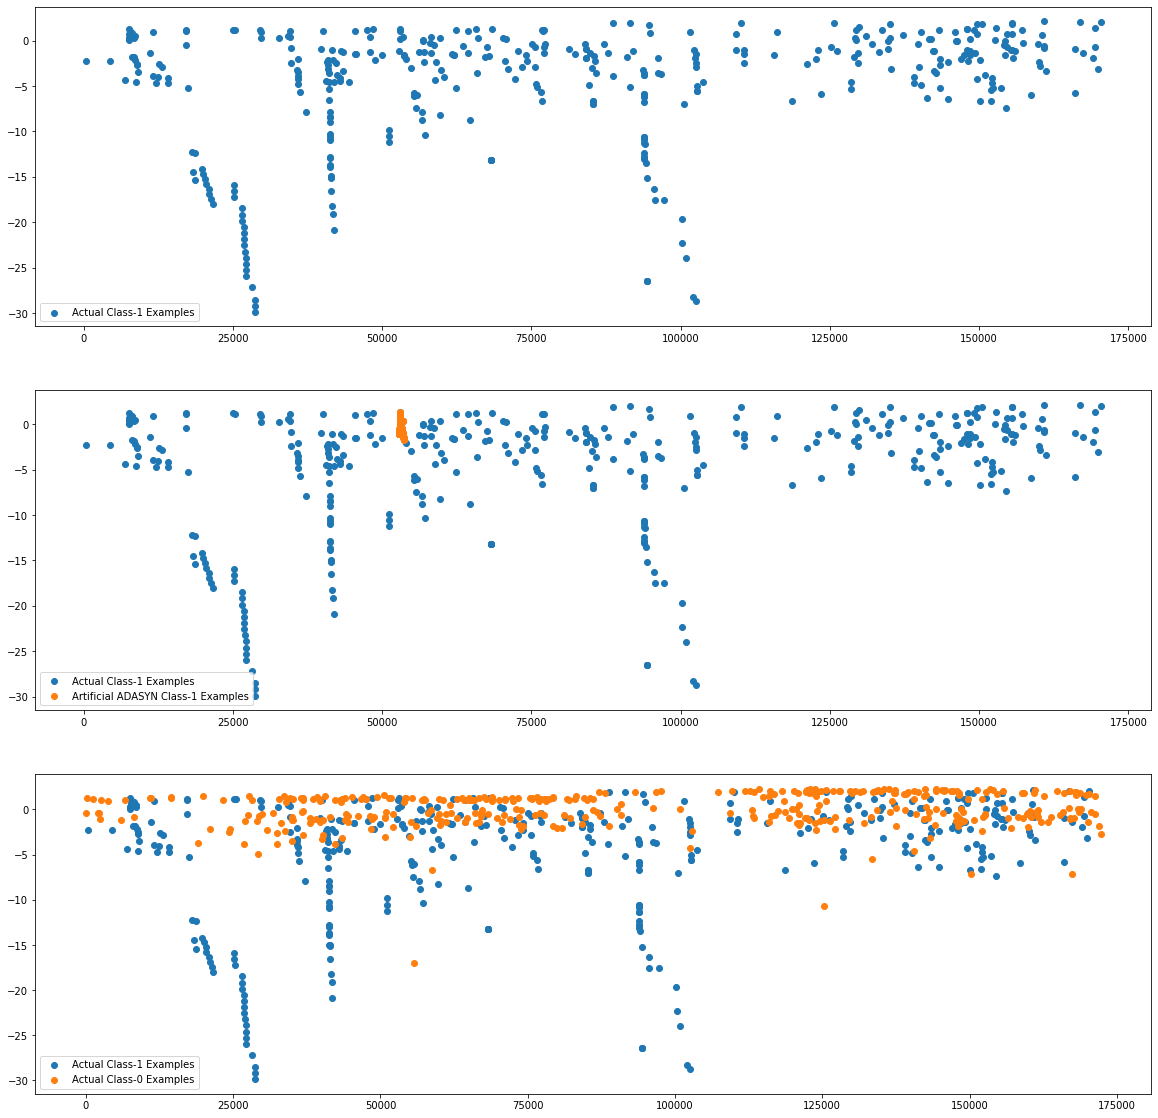

In [18]:
import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import ADASYN
from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Cross validation using K-Fold for Decision Tree

kfold = model_selection.StratifiedKFold(n_splits=5, random_state=100)
tree_kfold = DecisionTreeClassifier(random_state= 100)
results_tree_kfold = model_selection.cross_val_score(tree_kfold, X_train_adasyn, y_train_adasyn, cv=kfold, scoring = 'roc_auc')
print("ROC_AUC: %.3f%% (%.3f%%)" % (results_tree_kfold.mean()*100.0, results_tree_kfold.std()*100.0))

ROC_AUC: 95.909% (0.884%)


In [ ]:
# The resullts of the Cross Validation
results_tree_kfold

array([0.9511368 , 0.96358073, 0.94603494, 0.96725166, 0.96745021])

In [ ]:
# Hyper parameter tuning in Decision Tree

from sklearn.model_selection import GridSearchCV

tree_model = DecisionTreeClassifier(random_state=100)

# Create the parameter grid based on the results of random search 
tree_param_grid = {
    'max_depth': [5, 10, 20],
    'min_samples_leaf': [5, 7, 10],
    'criterion': ["gini", "entropy"],
    'min_samples_split' : [10, 20, 50, 100]
}

clf_DT_adasyn = RandomizedSearchCV(tree_model, tree_param_grid, cv=cv_num, scoring='roc_auc', n_jobs=-1, verbose=2)
clf_DT_adasyn.fit(X_train_adasyn, y_train_adasyn)

# values of best hyper parameters
DT_adasyn = clf_DT_adasyn.best_estimator_
DT_adasyn

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  8.2min finished


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [ ]:
test_eval(DT_adasyn, X_test_pt_df, y_test, 'Decision Tree', 'Adasyn')

Confusion Matrix
[[56284   582]
 [   79    17]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56866
           1       0.03      0.18      0.05        96

    accuracy                           0.99     56962
   macro avg       0.51      0.58      0.52     56962
weighted avg       1.00      0.99      0.99     56962
 

AUC-ROC
0.858976402126637


- The model is performing very badly, so discarding it

In [ ]:
#### Random Forest ####

from sklearn.ensemble import RandomForestClassifier

# Cross validation using K-Fold for Random Forest

kfold = model_selection.StratifiedKFold(n_splits=3, random_state=100)
RF_kfold_adasyn = RandomForestClassifier(random_state= 100)
adasyn_RF_kfold = model_selection.cross_val_score(RF_kfold_adasyn, X_train_adasyn, y_train_adasyn, cv=kfold, scoring = 'roc_auc')

In [ ]:
adasyn_RF_kfold

array([0.99588237, 0.99967219, 0.9999131 ])

In [ ]:
# Hyper parameter tuning in Random Forest

rf_model = RandomForestClassifier()
cv_num = StratifiedKFold(n_splits=3, random_state=100, shuffle=True)
rf_params={  
    'max_features': [3,4,5],
    'n_estimators': [ 30, 50, 100],
    'max_depth': [25, 10, 20],
    'min_samples_leaf': [5, 7, 10],
    'min_samples_split' : [10, 20, 50, 100]}

clf_RF = RandomizedSearchCV(rf_model, rf_params, cv=cv_num, scoring='roc_auc', n_jobs=-1, n_iter=20, verbose=2)
clf_RF.fit(X_train_adasyn, y_train_adasyn)
clf_RF.best_estimator_




Best_RF_adasyn = clf_RF.best_estimator_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 41.8min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 62.3min finished


In [ ]:
test_eval(Best_RF_adasyn, X_test_pt_df, y_test, 'Random Forest', 'Adasyn')

Confusion Matrix
[[56840    26]
 [   29    67]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.72      0.70      0.71        96

    accuracy                           1.00     56962
   macro avg       0.86      0.85      0.85     56962
weighted avg       1.00      1.00      1.00     56962
 

AUC-ROC
0.9699364514824323


- The model has good scores 

In [ ]:
#### XGBOOST ####

import xgboost as xgb
from sklearn import metrics

kfold = model_selection.StratifiedKFold(n_splits=3, random_state=100)
xgclf = xgb.XGBClassifier(random_state=100)
results_XG_adasyn = model_selection.cross_val_score(xgclf, X_train_adasyn, y_train_adasyn, cv=kfold, scoring = 'roc_auc')


results_XG_adasyn


In [25]:
# Hypertuning the parameters
xgb_model = xgb.XGBClassifier()

# Default-Run of default-hyperparameters
parameters = {'learning_rate': [0.1, 0.3, 0.5],
              'max_depth': [2, 6, 8],
              'min_child_weight': [3, 7, 11],
              'n_estimators': [100, 200, 300]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb_adasyn = model_selection.RandomizedSearchCV(xgb_model,
                                             parameters,
                                             n_jobs=-1,
                                             cv=3,
                                             scoring=scorer,
                                             refit=True,
                                             random_state=100,
                                             verbose=2)

clf_xgb_adasyn.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

In [26]:
# Tuned Hyperparamets
optimised_XGBoost_adasyn = clf_xgb_adasyn.best_estimator_


optimised_XGBoost_adasyn

AttributeError: ignored

In [19]:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=6,
              min_child_weight=3, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


# Values with tuned XGBoost model
test_eval(optimised_XGBoost_adasyn, X_test_pt_df.values, y_test.values, 'XGBoost', 'Adasyn')

NameError: ignored

- This model is good but not the best.

Logistic Regression

In [21]:
# Cross validation using K-Fold for Logistic Regression

kfold = model_selection.StratifiedKFold(n_splits=5, random_state=100)
adasyn_kfold = LogisticRegression()
results_kfold_Adasyn = model_selection.cross_val_score(adasyn_kfold, X_train_adasyn, y_train_adasyn, cv=kfold, scoring = 'roc_auc')
print("ROC_AUC: %.3f%% (%.3f%%)" % (results_kfold_Adasyn.mean()*100.0, results_kfold_Adasyn.std()*100.0))

ROC_AUC: 99.153% (0.438%)


Results of cross validation 

In [22]:
results_kfold_Adasyn

array([0.98597946, 0.98645148, 0.99429355, 0.99484165, 0.9960956 ])

Hyper-parameter tuning for Logistic Regression

In [23]:
# Hyper Parameter Tuning using GridSearch CV

log_model=LogisticRegression()
num_C={'C':np.logspace(-10, 1, 15),'class_weight':[None,'balanced'],'penalty':['l1','l2']}
cv_num = StratifiedKFold(n_splits=3, random_state=100, shuffle=True)

# Create grid search using 5-fold cross validation
clf_LR_adasyn = GridSearchCV(log_model, num_C, cv=cv_num, scoring='roc_auc', n_jobs=-1)
clf_LR_adasyn.fit(X_train_adasyn, y_train_adasyn)

# The values of the hyperparameters 
clf_LR_adasyn.best_estimator_

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
# Best model parameters
Best_Logistic_Adasyn = clf_LR_adasyn.best_estimator_
test_eval(Best_Logistic_Adasyn, X_test_pt_df, y_test, 'Logistic Regression', 'Adasyn')

Confusion Matrix
[[35239 21627]
 [    4    92]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.62      0.77     56866
           1       0.00      0.96      0.01        96

    accuracy                           0.62     56962
   macro avg       0.50      0.79      0.39     56962
weighted avg       1.00      0.62      0.76     56962
 

AUC-ROC
0.947320326879565


- This model has very bad precision so discarding it. 

##### Considerations: 

1. Here we are trying to predict the credit card fraud. So, for this purpose accuracy is not the best metric. Because the data is highly unbalanced with very few records belonging to fraud transaction (0.17%) and mostly to non-fradulen transactions (99.82%). So, the accuracy is always going to be high. 

2. So, here we have to give most importance to Recall. But at the same time we have to consider that the ROC-AUC score and Precision can not be too bad for the model. 

3. Considering these above points, we have created and tested different models using both unbalanced original data and balanced data using techniques like Random Over Sampling, SMOTE and ADASYN.

4. We have used cross validation to evaluate the models.

5. Out of all those models we are going to choose the one, that we think performs the best considering our purpose.  

##### Best Model Conclusion:

1. Of all the models created and tested a few models were better than the rest. They are namely:
    - XGBoost using Random Over Sampling
    - XGBoost and Random Forest using SMOTE
    - Random Forest using Adasyn 

2. Out of all the models specified above, I think the model - XGBoost using Random Over Sampling is preforming the best. It has a good Recall score and also good Precision and ROC-AUC. It is balanced and is performing very well. 

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

##### Selecting the best model - XGBoost using Random Over Sampling

In [ ]:
# perform the best oversampling method on X_train & y_train

clf = clf_xgb_b.best_estimator_ #initialise the model with optimum hyperparameters
final_model_b=clf.fit(X_train_ros, y_train_ros) # fit on the balanced dataset
test_eval(final_model_b, X_test.values, y_test.values, 'XGBoost', 'actual')
#print() --> #print the evaluation score on the X_test by choosing the best evaluation metric

Confusion Matrix
[[56836    30]
 [   21    75]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.71      0.78      0.75        96

    accuracy                           1.00     56962
   macro avg       0.86      0.89      0.87     56962
weighted avg       1.00      1.00      1.00     56962
 

AUC-ROC
0.9614362968792131


- Above is the results of Recall, Precision, f1-score and AUC-ROC on the original test data

In [ ]:
y_pred_b=final_model_b.predict(X_test.values)

### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 12


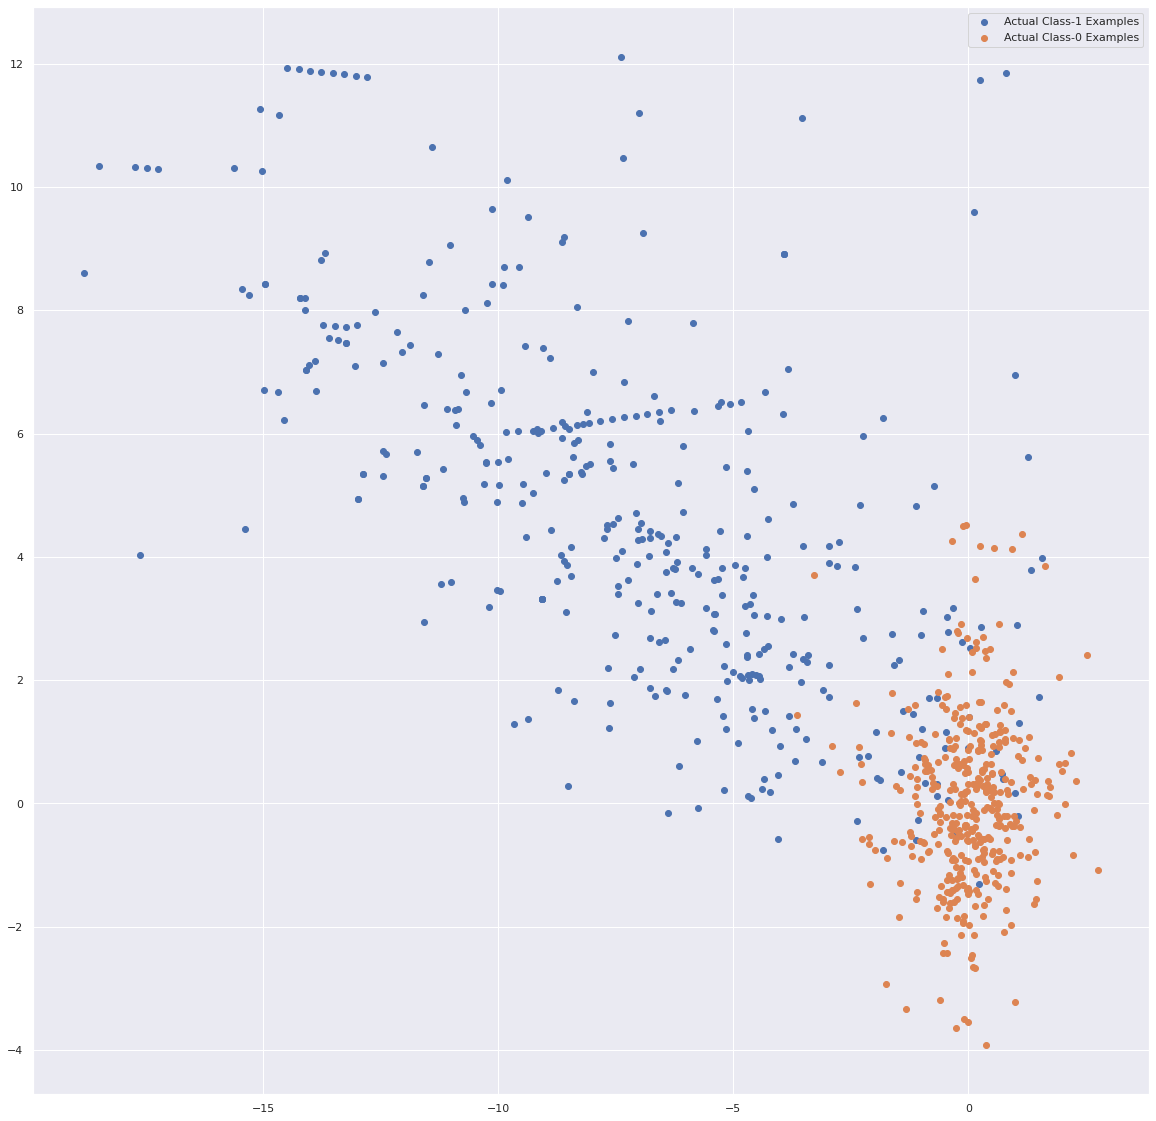

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

- The Threshold is calculated below

In [ ]:
print('Train auc =', metrics.roc_auc_score(y_test,y_pred_b))
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_b)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 0.8903612219955686
1


##### The XGBoost with Random Over Sampling is the best model for this purpose